In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [85]:
from jupyterthemes import jtplot
jtplot.style('chesterish')

In [94]:
%%html
<style>
div.input {
    display:none;
}
</style>

## Control 3: Regresión con variables continuas y categóricas

Jerónimo Aranda 150344  
Emiliano Zambrano 157043  
Jorge Rotter  158391

In [87]:
plt.rcParams['figure.figsize'] = (16, 8)

In [8]:
dat = [i.strip().split() for i in open("bacterias.dat").readlines()]
bact = pd.DataFrame(dat[1:],columns=dat[0]).drop('obs', axis=1)
bact.columns = bact.columns.str.strip().str.lower()
bact.rename(columns={'nbact':'n'}, inplace=True)

In [9]:
for col in ['temp', 'n']:
    bact[col] = bact[col].astype(int)
for col in ['acid', 'conc']:
    bact[col] = bact[col].astype(str)

In [10]:
bact['conc'] = bact.conc.astype(str)
bact['acid'] = bact.acid.astype(str)
bact['jtemp'] = bact.temp + np.sqrt(2)*np.random.randn(bact.shape[0])

## 1. Describa los datos gráficamente.

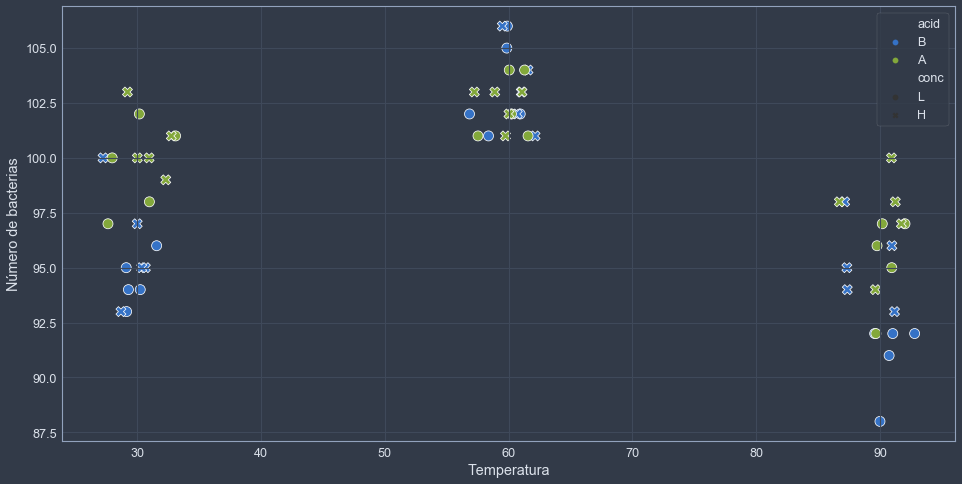

In [88]:
ax=sns.scatterplot(
    x='jtemp',
    y='n',
    hue='acid',
    style='conc',
    s=100,
    data=bact
)
ax.set_xlabel('Temperatura')
ax=ax.set_ylabel('Número de bacterias')

<b>Figura 1.</b>

Para describir los datos gráficamente, se optó por un plano con temperatura contra número de bacterias. A cada observación se le agregó ruido para una mejor visualización. Con ayuda del color de los puntos, se diferencia entre naturaleza ácida de color azúl y básica de color verde. Asimismo, con círculos se indica que el cultivo tiene concentración baja y con taches que tiene concentración alta. Primero, la temperatura no exhibe una relación lineal con el número de bacterias, pues el número de bacterias en 60 grados es mayor que en 30 y 90 grados. Luego, en 30 grados se observa que los cultivos con naturaleza básica tienen mayor número de bacterias; en 60 grados no se observa una relación clara entre la naturaleza del cultivo y el número de bacterias; por último, en 90 grados se aprecia que hay más cultivos ácidos con un número mayor de bacterias, pero por el momento no se puede hablar de una relación como la que se da en 30 grados. Finalmente, la concentración del cultivo parece no brindar información sobre el número de bacterias; en el plano se observa notando que los círculos y los taches están dispersos entre los distintos números de bacterias. Sin embargo, en 90 grados los cultivos con menor número de bacterias tienen concentración baja.

## 2. ¿Identiﬁca efectos sobre el número de bacterias por cambio en los niveles de temperatura?


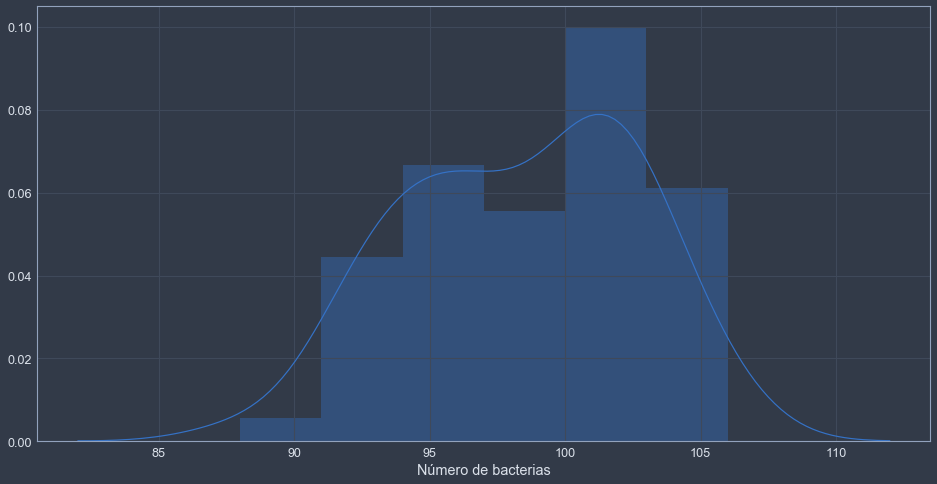

In [89]:
import warnings
warnings.filterwarnings("ignore")
ax=sns.distplot(bact.n.values)
ax=ax.set_xlabel('Número de bacterias')

<b>Figura 2.</b>

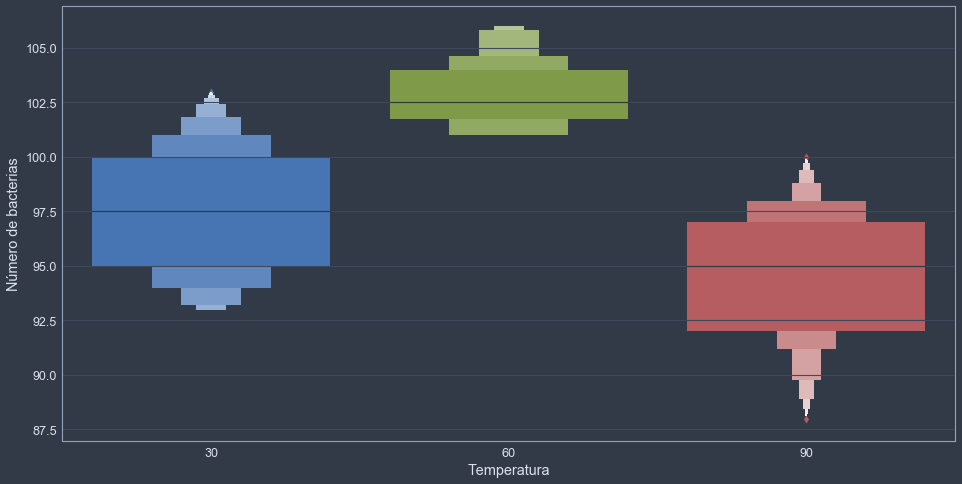

In [90]:
ax=sns.boxenplot(x='temp', y='n', data=bact)
ax.set_xlabel('Temperatura')
ax=ax.set_ylabel('Número de bacterias')

<b>Figura 3.</b>

La anterior gráfica nos ayuda a visualizar el número de bacterias para cada nivel de temperatura. Efectivamente se observa diferencia en la variable de respuesta para cada uno de los niveles de temperatura. La raya oscura en caja representa la mediana, valor que discrepa considerablemente entre niveles. Asimismo, los datos para 90 y 30 grados se comportan de manera similar aunque en 30 presentan más bacterias por cultivo. Por otra parte, en el nivel 60, los cultivos se comportan de manera distinta; las observaciones presentan mayor número de bacterias que en 30 y 90. En comparación a 90 grados, el 100% de las observaciones en 60 tienen un número superior. Por último, encontramos en el nivel intermedio una menor dispersión de la variable de respuesta que en los otros dos niveles. Esto es, cuando el cultivo está a 60 grados el número de bacterias tiene menor varianza. Por lo tanto, concluimos que a distinta temperatura se observa distinto número de bacterias.

## 3. ¿Es distinta la respuesta dependiendo de la naturaleza del cultivo?

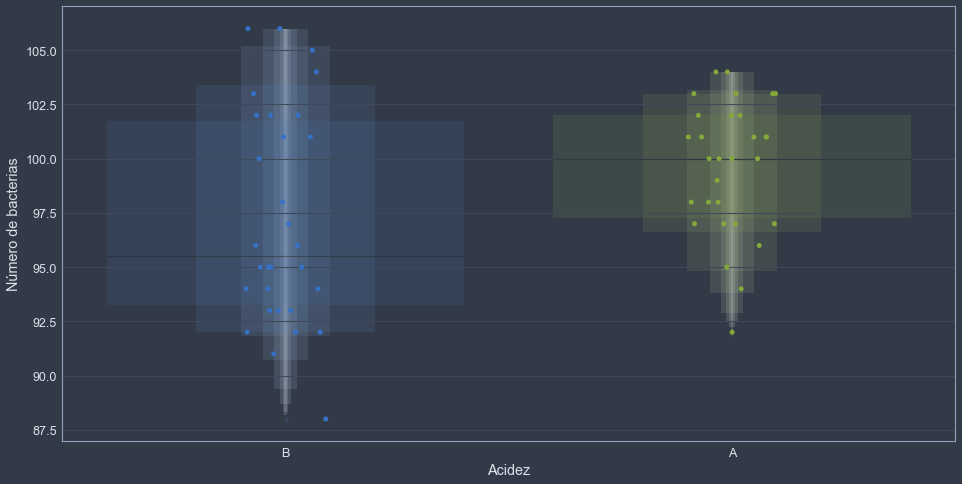

In [91]:
ax = sns.boxenplot(x='acid', y='n', data=bact) 
plt.setp(ax.collections, alpha=.15)
sns.stripplot(x='acid', y='n', data=bact, ax=ax)
ax.set_xlabel('Acidez')
ax=ax.set_ylabel('Número de bacterias')

<b>Figura 4.</b>

El anterior gráfico separa en dos cajas, los cultivos ácidos de los básicos. La mediana de los ácidos es superior por casi cinco bacterias, sin embargo existen observaciones básicas con una variable de respuesta mayor. En general, podemos ver que los cultivos básicos tienen más variabilidad que los ácidos. No obstante, la acidez no presenta un criterio tan informativo como la temperatura, ya que ambas cajas tienen un comportamiento similar aun cuando la mediana y varianza son distintas. Por lo tanto concluimos que la respuesta no es muy sensible a cambios en la naturaleza del caldo de cultivo. 

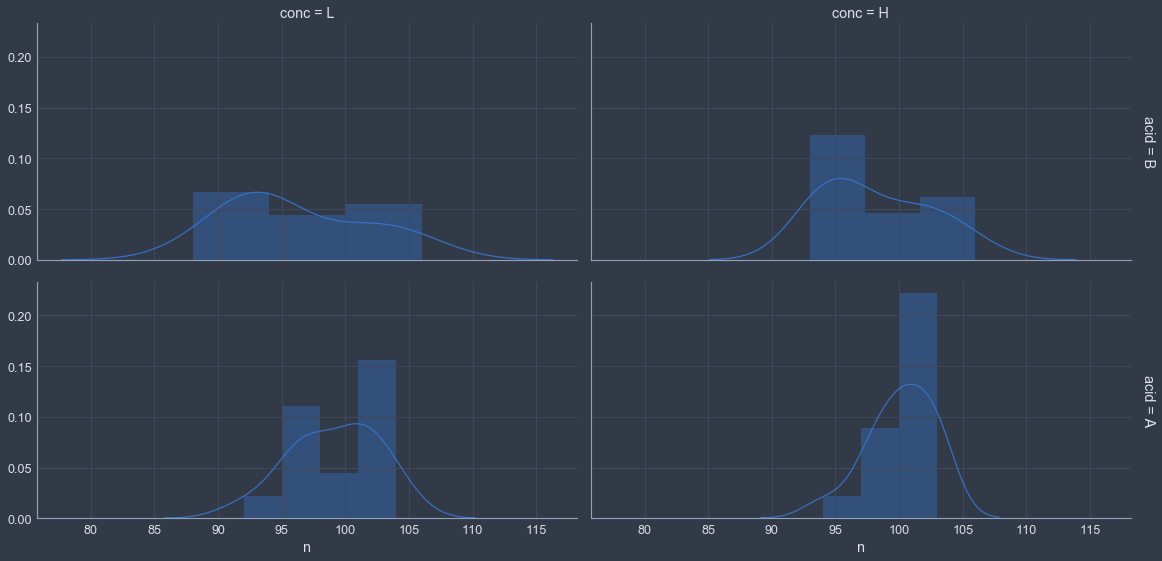

In [92]:
g = sns.FacetGrid(bact, row="acid", col="conc", margin_titles=True,size=4,aspect=2)
plt.rcParams['figure.figsize'] = (16, 8)
ax=g.map(sns.distplot, "n")

<b>Figura 5.</b>

Cada cuadrante del gráfico anterior representa la distribución del número de bacterias a un nivel de acidez por renglón, y a un nivel de concentración por fila. Claramente, la distribución no cambia mucho al cambiar la concentración pues la distribución es muy similar por columna. Sin embargo, la distribución es sensible a cambios en la naturaleza del cultivo pues cambia considerablemente por renglón. Por lo tanto, la anterior figura nos ayuda a confirmar lo anteriormente observado: la naturaleza ácida del cultivo brinda información significativa sobre el número de bacterias. 

In [34]:
m_acid = ols("n~C(acid)", bact).fit()
stats.anova_lm(m_acid)

,df,sum_sq,mean_sq,F,PR(>F)
C(acid),1.0,91.266667,91.266667,5.384282,0.023857
Residual,58.0,983.133333,16.950575,NaN,NaN


<b>Modelo 1.</b> Anova

Por otra parte, haciendo un modelo con el número de bacterias contra la naturaleza nos damos cuenta que la acidez es significativa cuando es el único regresor. Es decir, utilizando solamente esta variable resulta que con un valor-p de 2% el modelo de número de bacterias vs naturaleza ácida es más informativo que una línea horizontal para explicar el número de bacterias.

## 4. ¿Consideraría que los factores interactúan?

In [37]:
m_full = ols("n~C(conc)*C(acid)*C(temp)", bact).fit()
stats.anova_lm(m_full)

,df,sum_sq,mean_sq,F,PR(>F)
C(conc),1.0,32.266667,32.266667,9.175355,3.941596e-03
C(acid),1.0,91.266667,91.266667,25.952607,5.841283e-06
C(temp),2.0,664.900000,332.450000,94.535545,2.252700e-17
C(conc):C(acid),1.0,3.266667,3.266667,0.928910,3.399770e-01
C(conc):C(temp),2.0,24.233333,12.116667,3.445498,3.997267e-02
C(acid):C(temp),2.0,86.433333,43.216667,12.289100,4.902766e-05
C(conc):C(acid):C(temp),2.0,3.233333,1.616667,0.459716,6.342144e-01
Residual,48.0,168.800000,3.516667,NaN,NaN


<b>Modelo 2.</b> Anova

Observando la tabla anterior, llegamos a la conclusión que la temperatura interactúa con los demás regresores mientras que no se observa una interacción marcada de los otros dos. El valor-p de la interacción entre acidez y temperatura, así como el de la interacción entre concentración y temperatura, muestra que la temperatura junto con cualquiera de los otros dos regresores ayuda a explicar el número de bacterias en el cultivo. Por otra parte, con un valor-p más elevado, la interacción entre concentración y acidez no parece informar tanto como las interacciones con temperatura. Las anteriores conclusiones tienen sentido sobretodo cuando volvemos a la gráfica del punto 1 y observamos el desvío de la variable de respuesta en 60 grados con respecto a los otros dos niveles.

## 5. Valide su modelo mediante el análisis de residuales

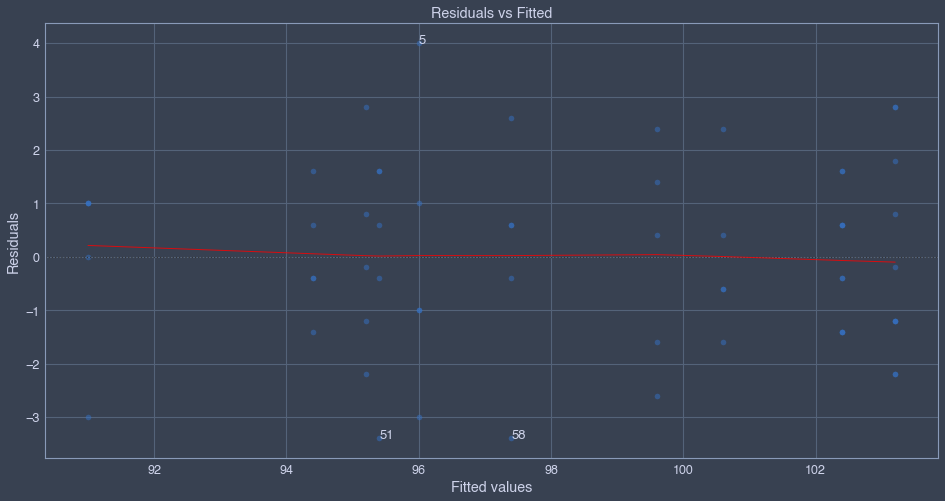

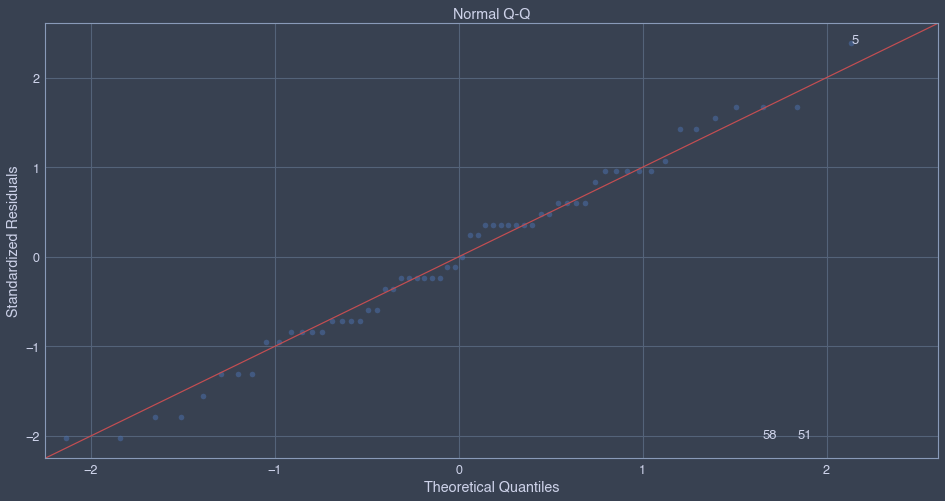

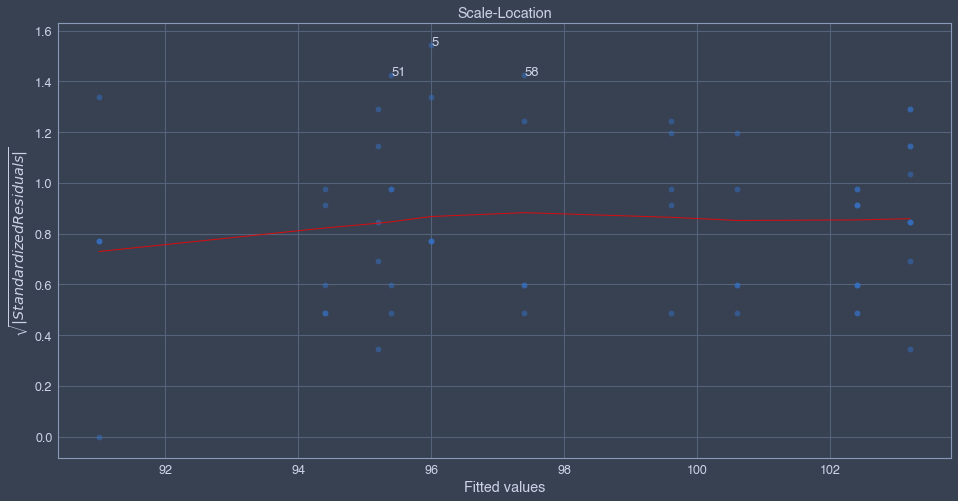

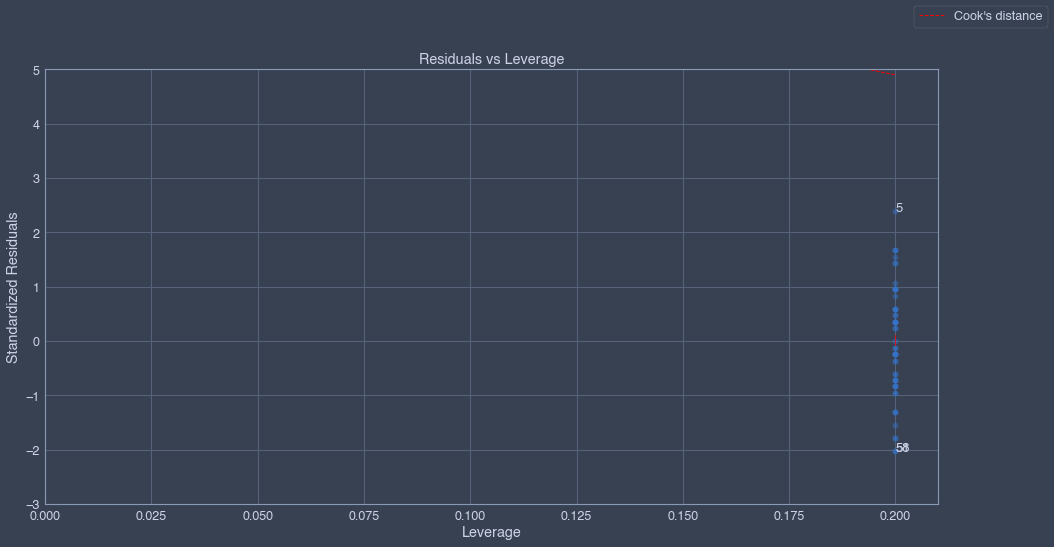

In [53]:
diagnostic_plots(bact.drop('n', axis=1), bact.n, m_full)

<b>Figura 6.</b>

Hicimos el análisis de residuales sobre el modelo completo, es decir sobre la regresión lineal múltiple que relaciona número de bacterias y los tres regresores. La primer gráfica de residuales contra valor ajustado no deja ver entre ellos relación alguna, por lo que es sensato suponer errores independientes. Asimismo, la dispersión de los puntos se observa aceptablemente constante; lo que nos permite suponer homocedasticidad. Después, la gráfica cuantil-cuantil normal no muestra desvíos considerables con respecto a normalidad. Finalmente, los residuales estandarizados contra el valor ajustado presentan indicios dependencia, no obstante no consideramos que sea suficiente para rechazar el supuesto de independencia entre los errores.

## 6.¿Considera que es necesario distinguir entre los niveles bajo y alto de la concentración del cultivo?

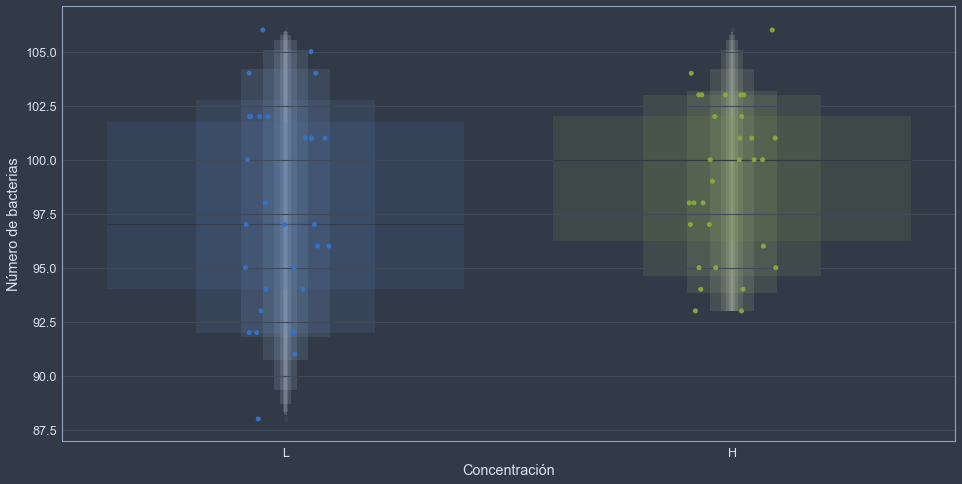

In [93]:
ax = sns.boxenplot(x='conc', y='n', data=bact) 
plt.setp(ax.collections, alpha=.15)
sns.stripplot(x='conc', y='n', data=bact, ax=ax)
ax.set_xlabel('Concentración')
ax=ax.set_ylabel('Número de bacterias')

<b>Figura 7.</b>

Desde el punto 1 se comentó que no parece haber una relación marcada entre el número de bacterias y la concentración, el anterior gráfico respalda esta hipótesis. Para empezar, el número de bacterias se comporta de forma similar para ambos niveles. Ciertamente las medianas presentan discrepancias pero esto se puede explicar por los primeros cuantiles en la concentración baja, ya que presentan valores menores a los observados en la concentración alta. Sin embargo, alrededor de la mediana y en cuantiles superiores el comportamiento de ambas concentraciones muestra profundas similitudes. 

In [33]:
from statsmodels.formula.api import ols
from statsmodels.api import stats, graphics

In [35]:
m_conc = ols('n~C(conc)', bact).fit()
stats.anova_lm(m_conc)

,df,sum_sq,mean_sq,F,PR(>F)
C(conc),1.0,32.266667,32.266667,1.795803,0.185447
Residual,58.0,1042.133333,17.967816,NaN,NaN


<b>Modelo 3.</b> Anova

Observando lo que se obtiene al correr el modelo lineal entre concentración y número de bacterias, concluimos que la concentración no representa un regresor significante para explicar el número de bacterias. Un elevado valor-p nos dice que es conveniente aceptar la hipótesis que una línea horizontal explica mejor la variable de respuesta que una función lineal con concentración. 

In [36]:
m_int = ols("n~C(conc)*C(acid)", bact).fit()
stats.anova_lm(m_int)

,df,sum_sq,mean_sq,F,PR(>F)
C(conc),1.0,32.266667,32.266667,1.906852,0.172800
C(acid),1.0,91.266667,91.266667,5.393556,0.023871
C(conc):C(acid),1.0,3.266667,3.266667,0.193049,0.662082
Residual,56.0,947.600000,16.921429,NaN,NaN


<b>Modelo 4.</b> Anova

Retomando lo observado en el punto 3, en particular en las distribuciones del número de bacterias para distintas combinaciones de acidez y concentración, la tabla anterior nos ayuda a ver que la concentración no dice mucho sobre el número de bacterias. El elevado valor-p de concentración con acidez en la tabla muestra que al interactuar con acidez, la concentración no explica mucho sobre la variable de respuestas. Por lo tanto, es válido concluir que para explicar el número de bacterias no es necesario distinguir entre caldos de cultivo con alta y baja concentración.

In [51]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

## 7. Concluya el reporte resaltando lo encontrado en su análisis.

Al realizar la anteriores pruebas estadísticas, junto con las correspondientes visualizaciones llegamos a conclusiones que en gran medida respaldan lo observado desde el punto 1. Para empezar, la temperatura es importante para explicar el conteo de bacterias. Asimismo, la temperatura interactúa con los otros dos regresores, ya que en ambos casos su interacción es significativa para la regresión. Por otra parte, la naturaleza ácida del cultivo aporta información valiosa pues encontramos que es importante distinguir entre ácido y básico para explicar el número de bacterias. No obstante, dicho regresor no se presenta tan significativo como lo es la temperatura, ni interactúa con concentración de la manera en que lo hace temperatura. En cuanto a concentración del cultivo, consideramos que no es necesario disntiguir entre alta y baja para explicar la variable de respuestas. Por lo tanto, creemos que tiene sentido modelar el conteo de bacterias en un caldo de cultivo utilizando la temperatura junto con la naturaleza ácida, y dejando de lado la conentración.  Finalmente, el análisis de residuales nos permite respaldar los supuestos que dan lugar a la regresión lineal múltiple.

Creémos que si bien se entiende que cada uno de los grupos de control, es decir, cada uno de los tipos de caldo de cultivo y sus específicas temperaturas, corresponde a un experimento que tiene que ser individualmente llevado a cabo, lo que hace imposible obtener muestras continuas para la temperatura, nos parece que el análisis desde un enfoque de regresión líneal no es el adecuado para entender el fenómeno si no que otras técnicas podrían darnos mejor comprensión del fenómeno.